<table>
<thead>
  <tr>
    <td></td>
    <td>
        Kinga Węzka <br>
        kinga.wezka@pw.edu.pl <br>
        Warsaw University of Technology  <br>
Faculty Geodesy and Cartography <br>
<a ref="https://www.google.com/maps/place/Gmach+G%C5%82%C3%B3wny+Politechniki+Warszawskiej/@52.220656,21.0094422,19z/data=!3m1!4b1!4m5!3m4!1s0x471ecce951c85a19:0x712b0e1503c42b91!8m2!3d52.220656!4d21.0099894"> N 52&ordm; 12' 45&quot; / E 21&ordm; 03' 51&quot;</a>
    </td>
    <td>
<a rel="license" href="https://www.pw.edu.pl"><img alt="Politechnika Warszawska" style="border-width:0" src="https://www.pw.edu.pl/design/pw/images/znak-pw.png" width="50%" /></a>
    </td>
  </tr>
</thead>
</table>

<div class="alert alert-block alert-success">
<b> Temat: </b> 
    Znajdowanie współrzędnych punktów płaskich wewnątrz figury geometrycznej (okrąg)
</div>

**Zadanie na kolokwium z Informatyki GIK PW sem. 4 (2021/2022) - punktacja:**

 | Zadanie | Zad. 01 | Zad. 02 | Zad. 03 | Zad. 04 | Suma|
 |---------|:-------:|:-------:|:-------:|:-------:|----:|
 | Punkty  |    2    |    4    |    4    |   4     |  14 |

### Dla  danych współrzędnych punktów płaskich x i y, wykonaj następujące działania:
+ **Zad.01** Połącz listy danych punktów x,y w tablicę (ndarray) o nazwie **dane**, zawierającą tyle wierszy ile  jest punktów w listach x,y oraz 3 kolumny, gdzie:
    + kolumna 1 to numer punktu (1,2,3,...200) - wygeneruj samodzielnie tę numeracje
    + kolumna 2 zawiera współrzędne x
    + kolumna 3 zawiera współrzedne y

 
+ **Zad.02** Wyznacz współrzędne x, y, będące średnią arytmetyczną danych współrzędnych x, y. Zbuduj kwadrat o środku w tym punkcie i o boku długości 10. w Zad.04 narysuj ten kwadrat (boki oraz wierzchołki) oraz przypisz mu etykietę label = 'kwadrat'


+ **Zad.03** Znajdź punkty, które znajdują się wewnątrz kwadratu. Wybierz te punkty i stwórz nową tablicę, gdzie w kolejnych kolumnach będą numer, x oraz y tych punktów. W osobnej tablicy zapisz pozostałe punkty. 
+ **Zad.03b** Znajdź punkty o skrajnych wartościach współrzędnej y (wartość minimalna oraz maksymalna spośród wszystkich współrzędnych y) oraz wyświetl numer oraz współrzędne tych punktów.


+ **Zad.04** Przygotuj wykres zawierający:
    + **dane**
    + wierzchołki i boki kwadratu
    + pokoloruj punkty wewnątrz i na zewnątrz kwadratu
    + przypisz etykiety kolejnym seriom danym (np. label = 'punkty wewnątrz kwadratu') i wyświetl legendę
    
    Zadbaj o aspekty wizualne i czytelność swojego wykresu

In [204]:
import numpy as np
from numpy.linalg import inv
from math import pi, sin, cos, sqrt, exp
from pylab import randn
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.linestyle'] = '-.'
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11
mpl.rcParams['axes.titlesize'] = 11
mpl.rcParams['axes.labelsize'] = 11
mpl.rcParams['axes.grid'] = True
mpl.rcParams['lines.markersize'] ** 2. # marker size in scatter

# Dane punkty x,y
n = 200
x = 4 * randn(n) + 15
y = 2 * randn(n) + 10

**Zad.01**

In [205]:
# Zad1. Złożenie tablicy
nr = np.arange(1, n+1)
data =  np.column_stack((nr.T, np.array(x).T, np.array(y).T)) 
print('wymiary tablicy (w, k):', np.shape(data))
print('tablica :\n', data)

wymiary tablicy (w, k): (200, 3)
tablica :
 [[  1.          15.66504556  11.21678364]
 [  2.          15.4751425   12.92211175]
 [  3.          18.73303155   6.88298912]
 [  4.          17.46130057   6.98010895]
 [  5.          11.38309336   9.26662715]
 [  6.           9.18251542  12.16603691]
 [  7.          11.96703694  10.48206279]
 [  8.           4.61454834  11.353038  ]
 [  9.          12.44616379   7.04629257]
 [ 10.          14.47449316  12.07824892]
 [ 11.          17.28608852   6.33236393]
 [ 12.          21.66824807   6.62315648]
 [ 13.           8.6457433   11.13859212]
 [ 14.          15.10631042   7.09431919]
 [ 15.          13.98749421  13.39191388]
 [ 16.          11.14835404  10.80207474]
 [ 17.          16.30214174  10.89789897]
 [ 18.           7.73967652  10.89743716]
 [ 19.          13.50297036   9.55148962]
 [ 20.          18.67791475   7.45412585]
 [ 21.           8.33342172   9.64270921]
 [ 22.          18.49579732   8.74668977]
 [ 23.          19.98234542  10.

**Zad.02**

In [206]:
# Zad2.
# Policzenie średnich wartości x, y, będących środkiem kwadratu:
x0 = np.mean(x)
y0 = np.mean(y)

# Wyznaczenie środka kwadratu kwaddratu o długości boku 10: 
# xy1 (lewy dolny róg) - system prawoskrętny - zgodnie z ruchem wskazówek zegara
a = 5
xy1 = [x0-a,y0-a] 
xy2 = [x0-a,y0+a]
xy3 = [x0+a,y0+a]
xy4 = [x0+a,y0-a]
pts_kwadrat = np.array([xy1, xy2, xy3, xy4])
print('wierzchołki: xy1 (lewy dolny róg) - system:\n', pts_kwadrat)

wierzchołki: xy1 (lewy dolny róg) - system:
 [[ 9.86705757  4.90119765]
 [ 9.86705757 14.90119765]
 [19.86705757 14.90119765]
 [19.86705757  4.90119765]]


Pkt 1 [9.86705757 4.90119765]
Pkt 2 [ 9.86705757 14.90119765]
Pkt 3 [19.86705757 14.90119765]
Pkt 4 [19.86705757  4.90119765]


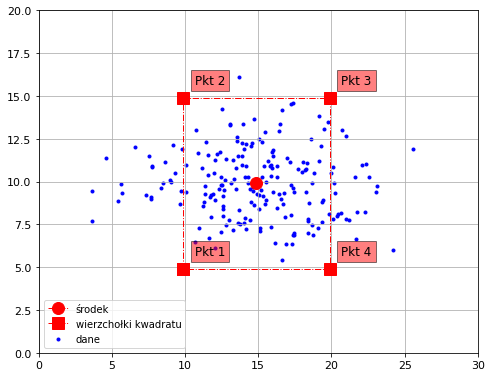

In [207]:
# Pomocniczo: narysowanie kwadratu z wyznaczonych współrzednych
xx = 20/2.54; yy = 16/2.54
fig, ax =  plt.subplots(nrows=1, ncols=1, figsize=(xx, yy))

ax.scatter(data[:,1], data[:,2], marker = '.', color = 'blue', label ='dane') 
ax.plot(x0, y0, marker = 'o', markersize =12, color = 'red', label ='środek') 

pts_kwadrat0 = np.array([xy1, xy2, xy3, xy4, xy1]) # dodanie pierwszego punktu na końcu tablicy aby domknać kwadrat na rysunku
ax.plot(pts_kwadrat0[:,0],  pts_kwadrat0[:,1], marker ='s',  markersize =12, color ='red', label = "wierzchołki kwadratu")
# opis wierzchołków
n = 1
for p in pts_kwadrat:
    name = f'Pkt {n}'
    print(name,  p)
    plt.text(p[0] + 0.8, p[1] + 0.8,  name, fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
    n+=1
ax.set_xlim(0, 30)
ax.set_ylim(0, 20)
ax.legend(loc='lower left')
plt.show()

**Zad.03**
Podział tablicy  - przyjęto że punkty na krawedzi znajdują się w obszarze kwadratu
+ Warunek na punkty w środku kwadratu, punkty wewnątrz kwadratu powinny mieć współrzędne
  + Pkt1(x) <= x <= Pkt4(x)  and Pkt1(y) <= y <= Pkt2(y)

In [208]:
# Zad3 - sposób A
# Klasyczna pętla z warunkiem
rows_inside = [] #pusta lista do zbierania wierszy wewnatrz obszaru kwadratu
rows_outside =[] #pusta lista do zbierania wierszy poza obszarem kwadratu
for rows in data:
    if (rows[1] >= pts_kwadrat[0,0] and rows[1] <= pts_kwadrat[3,0]  and 
        rows[2] >= pts_kwadrat[0,1] and rows[2] <= pts_kwadrat[1,1] ):
        rows_inside.append(rows)
    else:
        rows_outside.append(rows)
        
# konwersja list której elementami sa wiersze tablicy do tablicy numpy
inside = np.array(rows_inside)
outside = np.array(rows_outside)

In [209]:
# Zad3 - sposób A
# Metody numpy wykorzystujace mechanizm broadcasting i warunki logiczne 
d1 = data.copy()

inside = d1[np.where( (d1[:,1] >= pts_kwadrat[0,0])
                    & (d1[:,1] <= pts_kwadrat[3,0])
                    & (d1[:,2] >= pts_kwadrat[0,1]) 
                    & (d1[:,2] <= pts_kwadrat[1,1]))]

outside =d1[np.where( (d1[:,1] < pts_kwadrat[0,0]) 
                    | (d1[:,1] > pts_kwadrat[3,0]) 
                    | (d1[:,2] < pts_kwadrat[0,1]) 
                    | (d1[:,2] > pts_kwadrat[1,1]))]

**Zad.03b** - wartości skrajne

In [210]:
# Zad3b - to zadanie pewnie dało się rozwiązać na wiele sposobów chociazby z użyciem klasycznej petli

row_y_min = 0 
row_y_max = 0
for rows in data:
    if rows[2] == data[:, 2].min():
        row_y_min = rows
    elif rows[2] == data[:, 2].max():
        row_y_max = rows

print(f'Numer punktu o min. wartości y to {row_y_min[0]:.0f}, jego współ. x={row_y_min[1]:.4f} y={row_y_min[2]:.4f}') 
print(f'Numer punktu o max. wartości y to {row_y_max[0]:.0f}, jego współ. x={row_y_max[1]:.4f} y={row_y_max[2]:.4f}') 


Numer punktu o min. wartości y to 111, jego współ. x=16.6028 y=5.4022
Numer punktu o max. wartości y to 63, jego współ. x=13.6686 y=16.0981


**Zad.04**

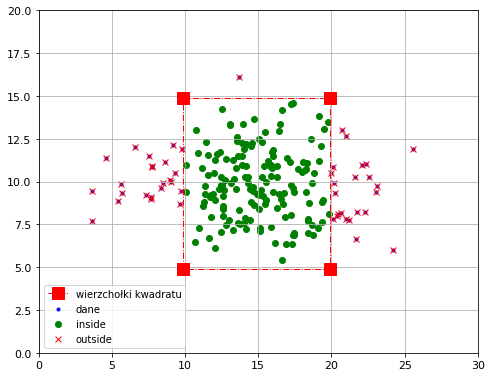

In [211]:
# Zad 4 - Rysunek 
xx = 20/2.54; yy = 16/2.54
fig, ax =  plt.subplots(nrows=1, ncols=1, figsize=(xx, yy))

ax.scatter(data[:,1], data[:,2], marker = '.', color = 'blue', label ='dane') 
ax.scatter(inside[:,1], inside[:,2], marker = 'o', color = 'green', label ='inside') 
ax.scatter(outside[:,1], outside[:,2], marker = 'x', color = 'red', label ='outside') 

pts_kwadrat0 = np.array([xy1, xy2, xy3, xy4, xy1]) # dodanie pierwszego punktu na końcu tablicy aby domknać kwadrat na rysunku
ax.plot(pts_kwadrat0[:,0],  pts_kwadrat0[:,1], marker ='s',  markersize =12, color ='red', label = "wierzchołki kwadratu") 

ax.set_xlim(0, 30)
ax.set_ylim(0, 20)
ax.legend(loc='lower left')
plt.show()